<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/MNIST/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importing tensorflow package and all relevant libraries.

In [175]:
import tensorflow as tf                  #import Tensorflow library
from tensorflow import keras             #import Keras api library for tensorflow
from keras import datasets               #import datasets provided by Keras API 

import numpy as np                      
import matplotlib.pyplot as plt              

In [176]:
fashion=datasets.fashion_mnist          #instantiating Fashion dataset from MNIST under Keras

In [177]:
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()   #loading MNIST Fashion dataset which does train & test split internally 

In [178]:
# checking the shape of x_train, y_train, x_test & y_test variables
print(train_images.shape)            
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [122]:
train_images[0]    #checking the data present in first row of x_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [123]:
train_labels[0]    #checking data present in first row of y_train 

9

In [124]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']  #creating a variable to hold name of the target variable values.

In [125]:
#creating a function to plot images from training dataset
def plot_sample(X,y,index):
  plt.figure(figsize = (5,2))
  plt.imshow(X[index])   #this function is used to print image
  plt.xlabel(class_names[y[index]])

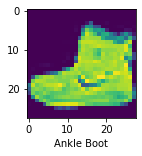

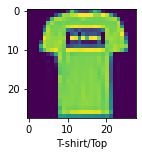

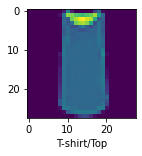

In [126]:
#printing first 3 images from the training dataset by calling the above created function
for index in range(0,3):
  plot_sample(train_images,train_labels,index)

In [127]:
#normalizing dataset i.e., the value in each and image has values from 0 to 255 which is nothing but the pixel, we'll normalize it to be between 0-1. 
#Normalizing will be done on the images from both training & testing datasets
train_images = train_images / 255.0
test_images = test_images / 255.0

In [129]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers

### Model with Relu Activation and a single Hidden Layer

In [155]:
model = Sequential([layers.Flatten(input_shape=(28,28)),  #we mention the input shape as the number of input pixels
layers.Dense(100,activation='relu'),                      #This is Hidden Layer1 and 100 is the number of neurons to be created with activation function as 'relu'
layers.Dense(10,activation='softmax')                     #This is Output Layer with 10 neurons in the output layer and here we've to mention the number of neurons as the number of output values in target variable and activation function ='softmax' for classifiction problem
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compiling model. Here loss is 'sparse_categorical_crossentropy' as it is multi class classification problem

model.summary()    #printing summary of the model

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels)) #Fitting model on train & test data to see accuracy & loss of model

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2078 - accuracy: 0.9237 - val_loss: 0.3163 - val_accuracy: 0.8904
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2021 - accuracy: 0.9255 - val_loss: 0.3179 - val_accuracy: 0.8903
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1991 - accuracy: 0.9269 - val_loss: 0.3173 - val_accuracy: 0.8923
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1971 - accuracy: 0.9278 - val_loss: 0.3179 - val_accuracy: 0.8906
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1962 - accuracy: 0.9280 - val_loss: 0.3188 - val_accuracy: 0.8904
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1938 - accuracy: 0.9294 - val_loss: 0.3195 - val_accuracy: 0.8916
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1910 - accuracy: 0.9308 - val_loss: 0.3200 - val_accuracy: 0.8931
Epoch 

* From the above we see that Accuracy of Training is 93.32% & Validation is 89.45% for 10 epochs.
* Also the Loss on Training is 0.1838 & Validation is 0.3167 for 10 epochs.

* Let us perform regularization on data to remove overfit.

### L2 Regularizer

In [158]:
from keras import regularizers

model_l2reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l2reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l2reg.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_l2reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.8395 - accuracy: 0.7216 - val_loss: 0.5022 - val_accuracy: 0.8301
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.8502 - val_loss: 0.4546 - val_accuracy: 0.8506
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8639 - val_loss: 0.4275 - val_accuracy: 0.8567
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3872 - accuracy: 0.8719 - val_loss: 0.4299 - val_accuracy: 0.8576
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3660 - accuracy: 0.8796 - val_loss: 0.4077 - val_accuracy: 0.8616
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8814 - val_loss: 0.3998 - val_accuracy: 0.8663
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3418 - accuracy: 0.8871 - val_loss: 0.3993 - val_accuracy: 0.8686
Epoch 

* From the above we see that Accuracy of Training is 89.82% & Validation is 87.5% for 10 epochs.
* Also the Loss on Training is 0.3125 & Validation is 0.3804 for 10 epochs.

### L1 Regularizer

In [160]:
from keras import regularizers

model_l1reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [161]:
model_l1reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 1.1274 - accuracy: 0.7197 - val_loss: 0.7052 - val_accuracy: 0.8283
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6543 - accuracy: 0.8435 - val_loss: 0.6265 - val_accuracy: 0.8420
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5797 - accuracy: 0.8568 - val_loss: 0.5924 - val_accuracy: 0.8479
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5527 - accuracy: 0.8585 - val_loss: 0.5658 - val_accuracy: 0.8471
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5140 - accuracy: 0.8677 - val_loss: 0.5288 - val_accuracy: 0.8575
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4953 - accuracy: 0.8710 - val_loss: 0.5367 - val_accuracy: 0.8549
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4797 - accuracy: 0.8721 - val_loss: 0.5150 - val_accuracy: 0.8596
Epoch 

* From the above we see that Accuracy of Training is 87.65% & Validation is 85.91% for 10 epochs.
* Also the Loss on Training is 0.4476 & Validation is 0.4858 for 10 epochs.

### L1 Regularizer with 2 Hidden Layers

In [163]:
from keras import regularizers

model_l1reg_2layers = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg_2layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg_2layers.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_40 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


In [164]:
model_l1reg_2layers.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 1.2046 - accuracy: 0.7167 - val_loss: 0.7375 - val_accuracy: 0.8318
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6878 - accuracy: 0.8496 - val_loss: 0.6455 - val_accuracy: 0.8506
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.8635 - val_loss: 0.6070 - val_accuracy: 0.8542
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5752 - accuracy: 0.8661 - val_loss: 0.5981 - val_accuracy: 0.8513
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5365 - accuracy: 0.8726 - val_loss: 0.5697 - val_accuracy: 0.8554
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5090 - accuracy: 0.8777 - val_loss: 0.5435 - val_accuracy: 0.8643
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4986 - accuracy: 0.8771 - val_loss: 0.5549 - val_accuracy: 0.8556
Epoch 

* From the above we see that Accuracy of Training is 88.61% & Validation is 87.08% for 10 epochs.
* Also the Loss on Training is 0.4542 & Validation is 0.4975 for 10 epochs.

### 25% Dropout with 2 Hidden Layers

In [166]:
from keras.layers import Dense
from keras.layers.core import Dropout

model_2layers_do = Sequential()

model_2layers_do.add(layers.Flatten(input_shape=(28,28)))
model_2layers_do.add(Dense(100,activation='relu')), Dropout(0.25)
model_2layers_do.add(Dense(80,activation='relu')), Dropout(0.25)
model_2layers_do.add(Dense(10,activation='softmax'))

model_2layers_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_do.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_46 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


In [168]:
model_2layers_do.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.8541 - acc: 0.7109 - val_loss: 0.4540 - val_acc: 0.8367
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4169 - acc: 0.8526 - val_loss: 0.4068 - val_acc: 0.8551
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3668 - acc: 0.8658 - val_loss: 0.4329 - val_acc: 0.8443
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3402 - acc: 0.8768 - val_loss: 0.3770 - val_acc: 0.8670
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3240 - acc: 0.8818 - val_loss: 0.3540 - val_acc: 0.8743
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2932 - acc: 0.8928 - val_loss: 0.3522 - val_acc: 0.8732
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2865 - acc: 0.8947 - val_loss: 0.3430 - val_acc: 0.8760
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.

* From the above we see that Accuracy of Training is 90.52% & Validation is 87.81% for 10 epochs.
* Also the Loss on Training is 0.2577 & Validation is 0.3377 for 10 epochs.

### Early Stopping Callback with 2 Hidden Layers

In [170]:
from keras.callbacks import EarlyStopping

model_2layers_es = Sequential()

model_2layers_es.add(layers.Flatten(input_shape=(28,28)))
model_2layers_es.add(Dense(100,activation='relu'))
model_2layers_es.add(Dense(80,activation='relu'))
model_2layers_es.add(Dense(10,activation='softmax'))

model_2layers_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_es.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_52 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


In [174]:
model_2layers_es.fit(x=train_images,y=train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1377 - acc: 0.9476 - val_loss: 0.4283 - val_acc: 0.8890
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - acc: 0.9481 - val_loss: 0.4398 - val_acc: 0.8874
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1312 - acc: 0.9499 - val_loss: 0.4517 - val_acc: 0.8842


* From the above we see that Accuracy of Training is 94.99% & Validation is 88.42% for 10 epochs.
* Also the Loss on Training is 0.1312 & Validation is 0.4517 for 10 epochs.

### Predicting the target values

In [180]:
predictions_es = model_2layers_es.predict(test_images) #predicting value using the Early Stopping model.

In [184]:
print("Predicted Value of {} image from Test Data is: {}".format(0,predictions_es[0])) # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value of {} image from Test Data is: {}".format(0,np.argmax(predictions_es[0]))) #this gives the value of prediction.
print("Actual value of {} image is: {}".format(0,test_labels[0])) #this gives the actual value

Predicted Value of 0 image from Test Data is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Value of 0 image from Test Data is: 9
Actual value of 0 image is: 9


### Conclusion

* This shows that actual & predicted value for a particular index '0' are same and our prediction is correct.

* We can repeat this process by choosing a model where the validation accuracy is less.